# Analisis de resultados

## Caracteristicas del experimento 

A continuación se resumen las caracteristicas manejadas en el experimento:
1. Tasas de transferencia manejadas: Normal, 2kpps, 4kpps, 6kpps, 8kpps, 10kpps. 
2. Dos replicas para cada caso.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os

Cargando los dataframe a partir de cvs

In [31]:
iperfDF = {}
pingDF = {}
summaryDF = {}
files = os.listdir(".")
print(files)

['ping_2kpps.csv', 'ping_4kpps.csv', 'iperf_2kpps.csv', 'resumen.csv', 'ping_6kpps.csv', 'iperf_10kpps.csv', '.ipynb_checkpoints', 'iperf_8kpps.csv', 'ping_10kpps.csv', 'iperf_4kpps.csv', 'summary.ipynb', 'iperf_normal.csv', 'iperf_6kpps.csv', 'ping_normal.csv', 'ping_8kpps.csv']


In [72]:
for e in files:
    if 'csv' in e:
        k = e.split('.')[0]
        if 'ping' in e:
            pingDF[k.split('_')[1]] = pd.read_csv(e,sep=';', index_col=0)
            pingDF[k.split('_')[1]].columns.name = 'metricas'
            pingDF[k.split('_')[1]].index.name = 'replica'
        elif 'iperf' in e:
            iperfDF[k.split('_')[1]] = pd.read_csv(e,sep=';', index_col=0)
            iperfDF[k.split('_')[1]].columns.name = 'metricas'
            iperfDF[k.split('_')[1]].index.name = 'replica'
        else:
            summaryDF['summary'] = pd.read_csv(e,sep=';', index_col=0)
            summaryDF['summary'].columns.name = 'metricas'
            summaryDF['summary'].index.name = 'replica'
            

# Verificando claves
print(iperfDF.keys())
print(pingDF.keys())
print(summaryDF.keys())

dict_keys(['8kpps', '6kpps', '2kpps', '10kpps', '4kpps', 'normal'])
dict_keys(['8kpps', '6kpps', '2kpps', '10kpps', '4kpps', 'normal'])
dict_keys(['summary'])


### Informacion iperf ###

In [73]:
for k in iperfDF:
    print('Medias iperf: ' + k)
    print(iperfDF[k])
    print()


Medias iperf: 8kpps
metricas  interval  transfer    BW
replica                           
0         0.0-10.0     118.0  98.6
1         0.0-10.3     121.0  98.6

Medias iperf: 6kpps
metricas  interval  transfer     BW
replica                            
0         0.0-10.1     121.0  100.0
1         0.0-10.2     121.0  100.0

Medias iperf: 2kpps
metricas  interval  transfer    BW
replica                           
0         0.0-10.2     119.0  98.2
1         0.0-10.1     118.0  98.2

Medias iperf: 10kpps
metricas  interval  transfer    BW
replica                           
0         0.0-10.2     117.0  96.8
1         0.0-10.2     118.0  97.0

Medias iperf: 4kpps
metricas  interval  transfer     BW
replica                            
0         0.0-10.2     120.0   98.4
1         0.0-10.3     122.0  100.0

Medias iperf: normal
metricas  interval  transfer    BW
replica                           
0         0.0-10.0     115.0  96.2
1         0.0-10.0     115.0  96.4



### Informacion ping ###

In [74]:
for k in pingDF:
    print('Medias ping: ' + k)
    print(pingDF[k])
    print()

Medias ping: 8kpps
metricas  p_tx  p_rx  p_loss    time  rtt_min  rtt_avg  rtt_max  rtt_mdev
replica                                                                  
0         10.0  10.0     0.0  9189.0    0.033    1.187   11.352     3.388
1         10.0  10.0     0.0  9201.0    0.023    0.785    7.264     2.160

Medias ping: 6kpps
metricas  p_tx  p_rx  p_loss    time  rtt_min  rtt_avg  rtt_max  rtt_mdev
replica                                                                  
0         10.0  10.0     0.0  9182.0    0.025    0.562     5.10     1.513
1         10.0  10.0     0.0  9197.0    0.033    0.537     4.91     1.457

Medias ping: 2kpps
metricas  p_tx  p_rx  p_loss    time  rtt_min  rtt_avg  rtt_max  rtt_mdev
replica                                                                  
0         10.0  10.0     0.0  9180.0    0.030    0.818    7.727     2.303
1         10.0  10.0     0.0  9190.0    0.038    1.139   10.800     3.220

Medias ping: 10kpps
metricas  p_tx  p_rx  p_loss    

### Información resumen ###

In [75]:
"""
axes = datosGraficas.plot.bar(rot=0, subplots=True)
    axes[1].legend(loc=2)  # doctest: +SKIP
    plt.show()
    
"""  
print("Resumen de las metricas")
summaryDF['summary']
print(summaryDF['summary'])

Resumen de las metricas
metricas     BW     RTT
replica                
10kpps     96.9  0.5860
6kpps     100.0  0.5495
normal     96.3  0.6240
8kpps      98.6  0.9860
2kpps      98.2  0.9785
4kpps      99.2  0.8720


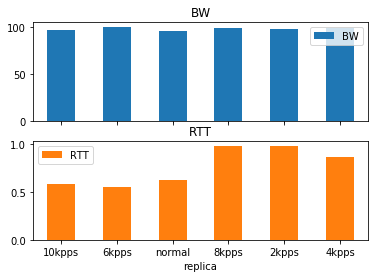

In [76]:
axes = summaryDF['summary'].plot.bar(rot=0, subplots=True)
axes[1].legend(loc=2)  # doctest: +SKIP

## BUGS 

1. Los resultados a mi modo de ver estan dando malos. Hay que poner mas tiempo para ver si a la larga se inunda la red tal y como se espera.